In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

C:\Users\ruthvikudutha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import os 
os.chdir("C:\\Users\\ruthvikudutha\\Desktop\\Data Sets")

In [6]:
data = pd.read_csv("data_collected_clustering.csv")

In [7]:
data

,Height,Weight
0,61.825092,57.825092
1,69.108629,66.108629
2,70.029101,71.029101
3,68.434763,69.434763
4,61.556468,56.556468
5,68.610262,70.610262
6,63.526340,65.526340
7,62.820481,62.820481
8,64.246562,60.246562
9,61.116298,62.116298


In [8]:
data.describe()

,Height,Weight
count,75.000000,75.000000
mean,64.261610,63.034943
std,3.292811,4.412725
min,56.093852,52.093852
25%,62.238138,59.355446
50%,64.246562,62.831384
75%,66.472019,66.087063
max,71.054557,71.279161


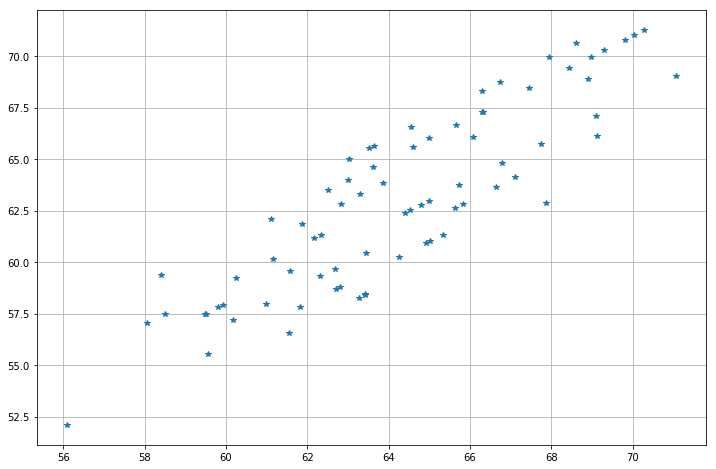

In [9]:
# plotting graph bw height and weight
plt.figure(figsize=[12,8])
plt.plot(data["Height"],data["Weight"],"*")
plt.grid(True)
plt.show()

In [11]:
k_means = KMeans(n_clusters=6)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
centroids = k_means.cluster_centers_
centroids

array([[59.33673598, 57.00340264],
       [65.59412319, 62.59412319],
       [69.33096472, 70.13096472],
       [62.3888653 , 59.74180647],
       [63.61722113, 64.70055447],
       [67.04811807, 66.95720898]])

In [ ]:
##

In [13]:
inert = k_means.inertia_
inert

192.6635604557187

In [15]:
# to set the border limits in the figure
x_min , x_max, = data.iloc[:,0].min()-2, data.iloc[:,0].max()+4
y_min, y_max = data.iloc[:,1].min()-2, data.iloc[:,1].max()+4

# generating all possible pairs of height and weight
xx, yy = np.meshgrid(np.arange(x_min,x_max,.02), np.arange(y_min,y_max,.02))

#predicting the "class" of each pair with the model we build
Z = k_means.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

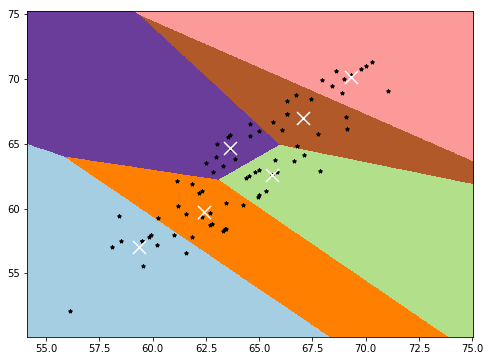

In [19]:
# plotting the figure for the pairs created and corresponding classes
plt.figure(figsize=[8,6])
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest' , extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Paired,aspect="auto",origin='lower') #


# plotting actual data on top of the above figure
plt.plot(data.iloc[:,0],data.iloc[:,1],'k*',markersize=4)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=169,linewidths=3,color='w',zorder=8) 
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks()
plt.yticks()
plt.show()